In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import layers, models

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [7]:
from PIL import Image

In [5]:
## Load the image first

In [8]:
image = Image.open('cat_gray.PNG')

In [12]:
image.mode

'RGBA'

In [13]:
## Convert to gray sclae

In [14]:
image = image.convert('L')

In [16]:
image.mode

'L'

In [18]:
image.size

(225, 246)

In [10]:
## Reshape the imgae for better size

In [20]:
image = image.resize((256,256))

In [21]:
image.size

(256, 256)

In [22]:
## Normalize the image - to do that need to convert it to numpy array

In [23]:
image = np.array(image)

In [24]:
type(image)

numpy.ndarray

In [25]:
image.shape

(256, 256)

In [29]:
image = image/255

In [50]:
## Making image tensorflow ready

In [31]:
image = np.expand_dims(image, axis=(0,-1))

In [32]:
image.shape

(1, 256, 256, 1)

In [36]:
## Introduce the blur filter - manually

In [34]:
blur_filter = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

In [37]:
## Modify the blur filter based on tensorflow requirement

In [39]:
blur_filter = blur_filter.reshape(3,3,1,1) #H, W, in_channels, out_channels

In [40]:
## Apply blur filter on main image

In [45]:
blurred_image = tf.nn.conv2d(image, blur_filter, strides=1, padding='SAME')

In [42]:
type(blurred_image)

tensorflow.python.framework.ops.EagerTensor

In [43]:
## Convert this tensor to numpy array

In [46]:
blurred_image = blurred_image.numpy().squeeze()

In [47]:
## Visualization

In [48]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

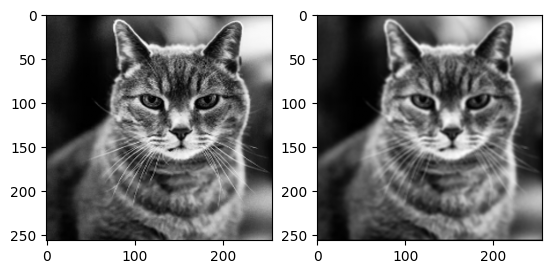

In [49]:
plt.subplot(1,2,1)
plt.imshow(image.squeeze(), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(blurred_image, cmap='gray')
plt.show()